#       WORLD HAPPINESS REPORT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

In [2]:
#extracting file

data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [3]:
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
data.columns #To check column names

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
#renaming the columns
data.rename(columns = {'Happiness Rank': 'Rank', 'Happiness Score': 'Score','Standard Error':'Error','Economy (GDP per Capita)':'Economy','Health (Life Expectancy)':'Life','Trust (Government Corruption)':'Trust','Dystopia Residual':'Dystopia_Residual'},inplace= True)

In [6]:
data.describe()

,Rank,Score,Error,Economy,Family,Life,Freedom,Trust,Generosity,Dystopia_Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
#filling the data with '0' value

data['Economy']=data['Economy'].replace(0,data['Economy'].mean())

data['Family']=data['Family'].replace(0,data['Family'].mean())
data['Life']=data['Life'].replace(0,data['Life'].mean())
data['Freedom']=data['Freedom'].replace(0,data['Freedom'].mean())
data['Trust']=data['Trust'].replace(0,data['Trust'].mean())
data['Generosity']=data['Generosity'].replace(0,data['Generosity'].mean())


In [8]:
data.describe()

,Rank,Score,Error,Economy,Family,Life,Freedom,Trust,Generosity,Dystopia_Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.851493,0.997318,0.634248,0.431328,0.144330,0.238797,2.098977
std,45.754363,1.145010,0.017146,0.397388,0.260556,0.241870,0.146734,0.119484,0.125252,0.553550
min,1.000000,2.839000,0.018480,0.015300,0.139950,0.047760,0.076990,0.002270,0.001990,0.328580
25%,40.250000,4.526000,0.037268,0.557532,0.861422,0.447215,0.329603,0.062550,0.154913,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.108770,0.217155,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    object 
 2   Rank               158 non-null    int64  
 3   Score              158 non-null    float64
 4   Error              158 non-null    float64
 5   Economy            158 non-null    float64
 6   Family             158 non-null    float64
 7   Life               158 non-null    float64
 8   Freedom            158 non-null    float64
 9   Trust              158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia_Residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [10]:
data.isna().sum()

Country              0
Region               0
Rank                 0
Score                0
Error                0
Economy              0
Family               0
Life                 0
Freedom              0
Trust                0
Generosity           0
Dystopia_Residual    0
dtype: int64

In [11]:
data.set_index('Country',inplace = True)


Visualization

In [12]:
ncol,nrow = 4,3
colNames = data.columns.values
print(colNames)

['Region' 'Rank' 'Score' 'Error' 'Economy' 'Family' 'Life' 'Freedom'
 'Trust' 'Generosity' 'Dystopia_Residual']


In [13]:
enum_obj = enumerate(colNames)
print(list(enum_obj))

[(0, 'Region'), (1, 'Rank'), (2, 'Score'), (3, 'Error'), (4, 'Economy'), (5, 'Family'), (6, 'Life'), (7, 'Freedom'), (8, 'Trust'), (9, 'Generosity'), (10, 'Dystopia_Residual')]


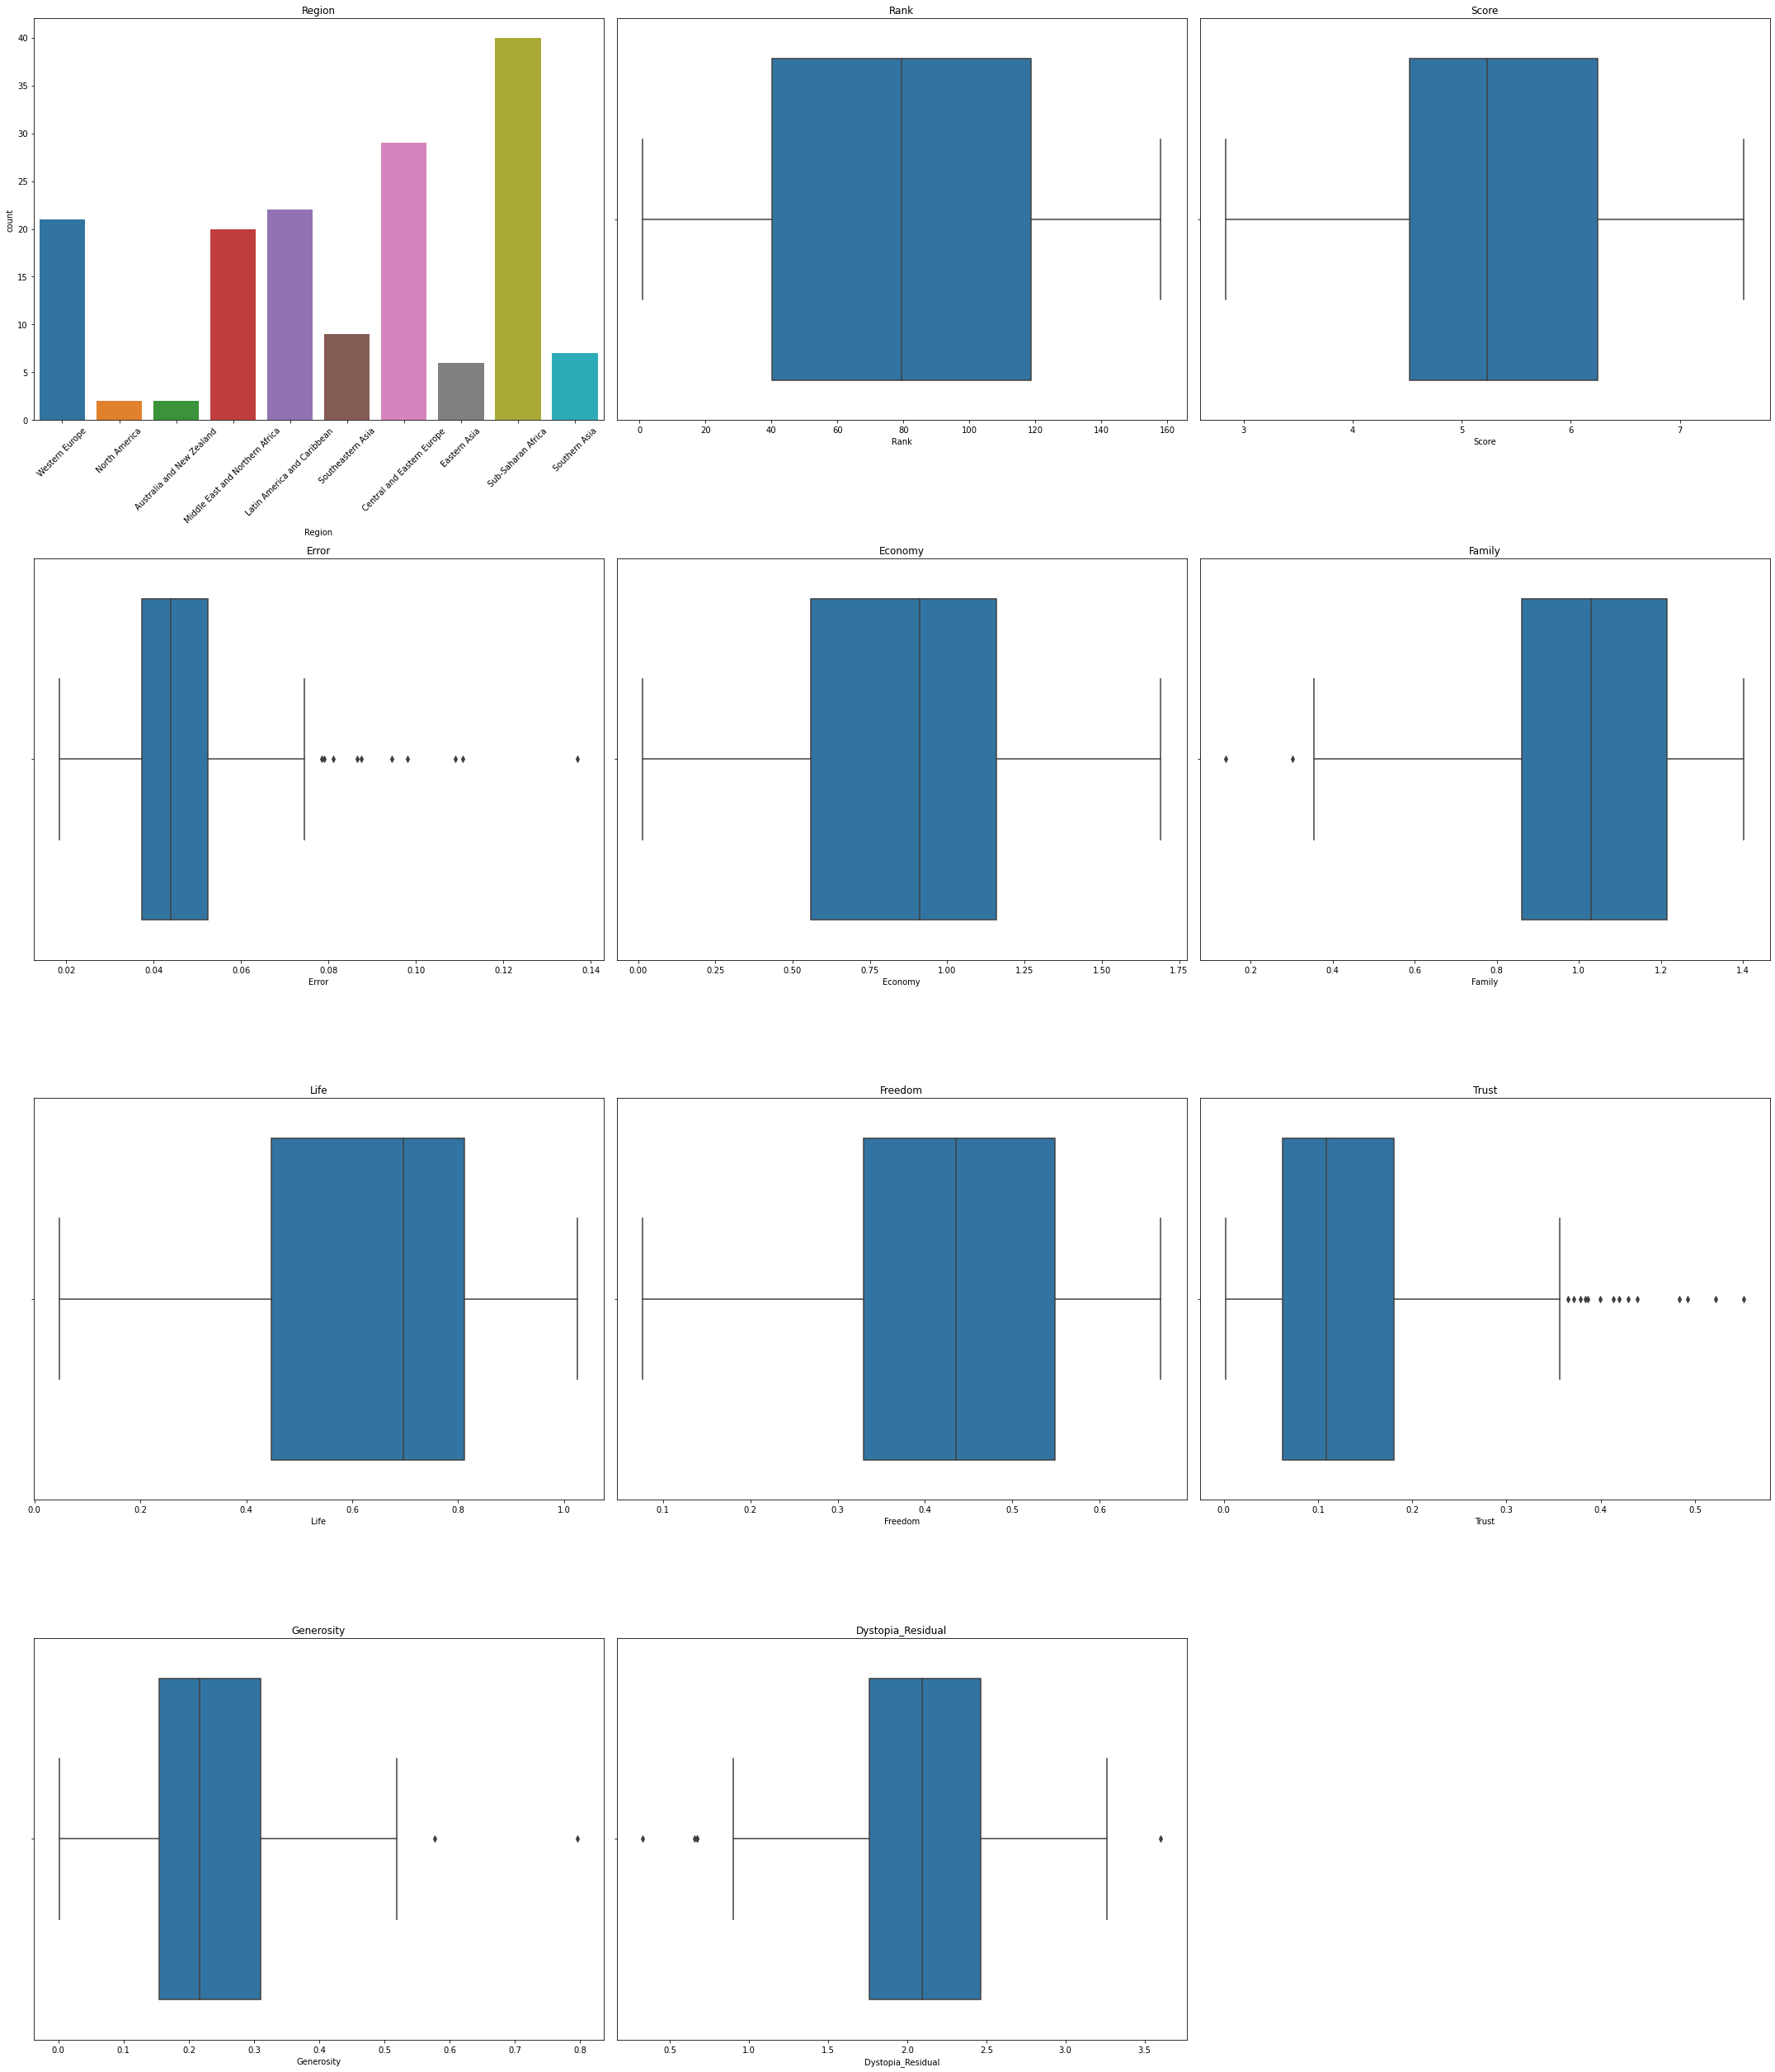

In [14]:

plt.figure(figsize = (30,35))
for index,col in enumerate(colNames):
    plt.subplot(ncol,nrow,index+1)
    if data[col].dtype == 'object':
        sns.countplot(data[col])
        plt.title(col)
        plt.xticks(rotation = 45)
    else:
        sns.boxplot(data[col])
        plt.title(col)
    plt.tight_layout()
plt.show()

In [15]:
#importing libraries

from scipy.stats import zscore

### Applying IQR Method

In [16]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1

data1 = data.drop(columns = 'Region')
data_new = data1[~((data1 < (Q1-1.5*IQR)) | (data1> (Q3 + 1.5*Q3))).any(axis = 1)]


In [17]:
print('Shape - before and after:\n')
print('shape before'.ljust(20),":",data1.shape)
print('shape after'.ljust(20),":",data_new.shape)
print('percentage loss'.ljust(20),":",(data1.shape[0]-data_new.shape[0])/data1.shape[0])

Shape - before and after:

shape before         : (158, 10)
shape after          : (147, 10)
percentage loss      : 0.06962025316455696


### Applying Z-Score Method

In [18]:
data1 = data.drop(columns = 'Region')
z=np.abs(zscore(data1))
threshold = 3
data_new = data1[(z<3).all(axis=1)]

In [19]:
print('Shape - before and after:\n')
print('shape before'.ljust(20),":",data1.shape)
print('shape after'.ljust(20),":",data_new.shape)
print('percentage loss'.ljust(20),":",(data1.shape[0]-data_new.shape[0])/data1.shape[0])

Shape - before and after:

shape before         : (158, 10)
shape after          : (150, 10)
percentage loss      : 0.05063291139240506


#### Apply zscore method helps us with less percentage loss when compared to IQR method

In [20]:
data_new

,Rank,Score,Error,Economy,Family,Life,Freedom,Trust,Generosity,Dystopia_Residual
Country,,,,,,,,,,
Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
Ivory Coast,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
Burkina Faso,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
Afghanistan,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210


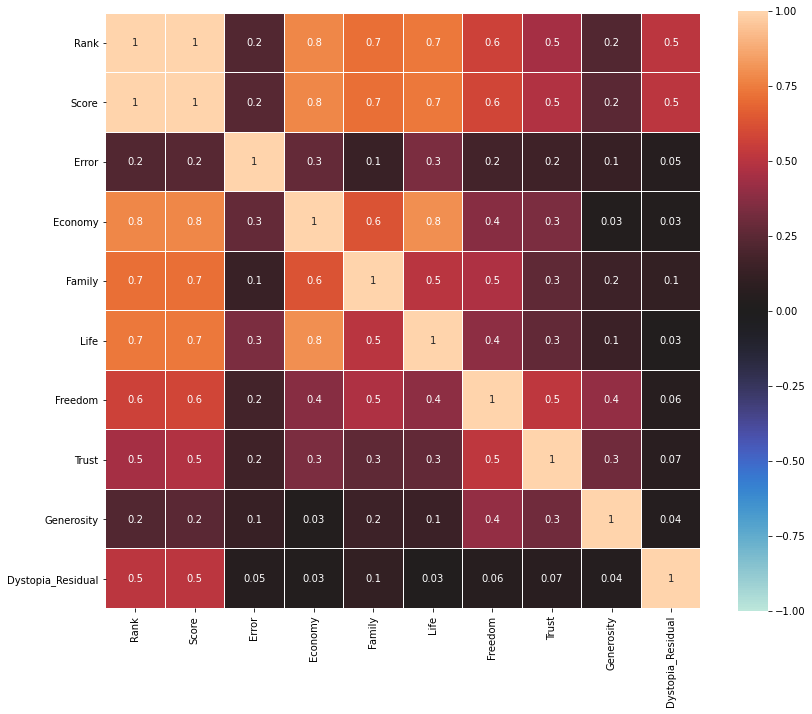

In [21]:
data_corr = data_new.corr().abs() #to get the correlation values
plt.figure(figsize=(12,10))
sns.heatmap(data_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=0.1)
plt.tight_layout()

In [22]:
df = data_new.drop(columns = 'Rank')

In [23]:
df

,Score,Error,Economy,Family,Life,Freedom,Trust,Generosity,Dystopia_Residual
Country,,,,,,,,,
Switzerland,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
Ivory Coast,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
Burkina Faso,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
Afghanistan,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210


In [24]:
Region = data['Region']

In [25]:
df_new = pd.concat([df, Region], axis=1, join="inner")
df_new

,Score,Error,Economy,Family,Life,Freedom,Trust,Generosity,Dystopia_Residual,Region
Country,,,,,,,,,,
Switzerland,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Western Europe
Iceland,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Western Europe
Denmark,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Western Europe
Norway,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Western Europe
Canada,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,North America
...,...,...,...,...,...,...,...,...,...,...
Ivory Coast,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723,Sub-Saharan Africa
Burkina Faso,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,Sub-Saharan Africa
Afghanistan,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,Southern Asia


#### Encode the categorical variables


In [26]:
pip install category_encoders

In [27]:
import category_encoders as ce

ohe = ce.OneHotEncoder(cols = ['Region'],use_cat_names=True)
WHA = ohe.fit_transform(df_new)
WHA

,Score,Error,Economy,Family,Life,Freedom,Trust,Generosity,Dystopia_Residual,Region_Western Europe,Region_North America,Region_Australia and New Zealand,Region_Middle East and Northern Africa,Region_Latin America and Caribbean,Region_Southeastern Asia,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Sub-Saharan Africa,Region_Southern Asia
Country,,,,,,,,,,,,,,,,,,,
Switzerland,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1,0,0,0,0,0,0,0,0,0
Iceland,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,1,0,0,0,0,0,0,0,0,0
Denmark,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,1,0,0,0,0,0,0,0,0,0
Norway,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,1,0,0,0,0,0,0,0,0,0
Canada,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ivory Coast,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723,0,0,0,0,0,0,0,0,1,0
Burkina Faso,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,0,0,0,0,0,0,0,0,1,0
Afghanistan,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,0,0,0,0,0,0,0,0,0,1


In [28]:
# Split data in features and labels

In [29]:
x = WHA.drop(columns = ['Score'])
y = WHA['Score']

# Visualizing Relationship


- Scatter plot is used to see the relationship.


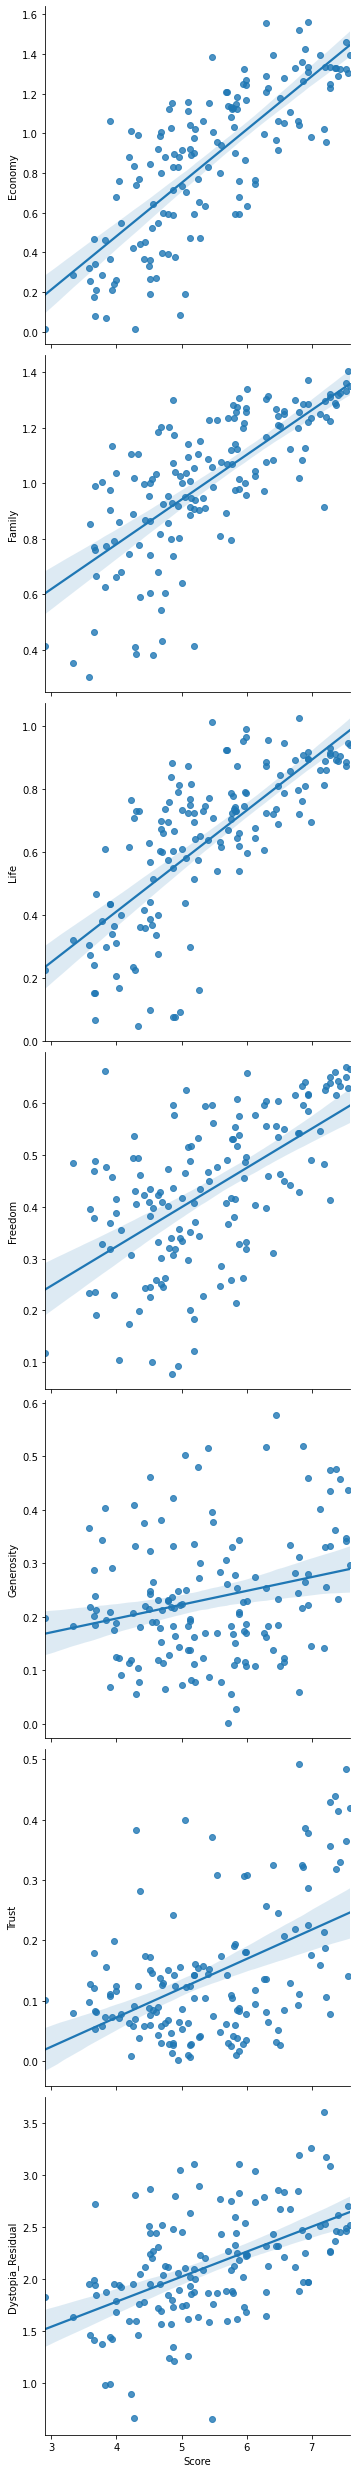

In [30]:
sns.pairplot(data=WHA, kind='reg', size = 5,
                  x_vars=['Score'],
                  y_vars=['Economy', 'Family','Life', 'Freedom', 'Generosity', 'Trust', 'Dystopia_Residual'])

# Data Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)


### Split data into train and test

In [33]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.16, random_state=2) #not applying scaled data
y_train.head()

Country
Somaliland region    5.057
Czech Republic       6.505
Denmark              7.527
Cameroon             4.252
South Korea          5.984
Name: Score, dtype: float64

# MODEL BUILDING

Let us apply many model building techniques one by one:

## Linear Regression Method

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
#Training the data

Linear_reg = LinearRegression()
Linear_reg.fit(x_train,y_train)

LinearRegression()

In [64]:
Linear_reg.score(x_train,y_train)


0.9918410544408556

####  Adjusted R2 Score


In [37]:
y_predict = Linear_reg.predict(x_test)

In [38]:
from sklearn.metrics import r2_score

In [39]:
print("The r2_score of the model is:\n",'\n',r2_score(y_test, y_predict))

The r2_score of the model is:
 
 0.9692150034349165


In [40]:
WHA.head(1)

,Score,Error,Economy,Family,Life,Freedom,Trust,Generosity,Dystopia_Residual,Region_Western Europe,Region_North America,Region_Australia and New Zealand,Region_Middle East and Northern Africa,Region_Latin America and Caribbean,Region_Southeastern Asia,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Sub-Saharan Africa,Region_Southern Asia
Country,,,,,,,,,,,,,,,,,,,
Switzerland,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1,0,0,0,0,0,0,0,0,0


In [41]:
Linear_reg.predict(Scaler.transform([[0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1,0,0,0,0,0,0,0,0,0]]))

array([7.56765952])

## GridSearchCV

Let's use GridSearchCV for the best parameter to improve the accuracy

The Hyper Parameter Tuning


In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
#Hyper Parameter tuning techniques

In [44]:
param_grid = {'fit_intercept':[True, False],
 "normalize":[True, False],
 "copy_X":[True, False],
 "positive":[True, False]
 }

In [45]:
gridsearch = GridSearchCV(LinearRegression(), param_grid = param_grid, cv = 5, scoring = "r2")

In [46]:
gridsearch.fit(WHA.drop(columns = 'Score'), WHA['Score'])

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'positive': [True, False]},
             scoring='r2')

In [47]:
gridsearch.best_estimator_

LinearRegression(fit_intercept=False, normalize=True, positive=True)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
Linear_reg1 = LinearRegression(fit_intercept=False, normalize=True, positive=True)

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.16, random_state=2)

In [51]:
Linear_reg1.fit(x_train,y_train)

LinearRegression(fit_intercept=False, normalize=True, positive=True)

In [52]:
y1_predict = Linear_reg1.predict(x_test)

In [53]:
print("The r2_score of the model after hyper parameter tuning is:\n",'\n',r2_score(y_test, y_predict))

The r2_score of the model after hyper parameter tuning is:
 
 0.9692150034349165


In [54]:
#gridsearch cv didn't help us with increasing the score

_____________________________________________________________

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [56]:

cross_val_score = cross_val_score(Linear_reg,x,y,cv=KFold(12,shuffle=True))
cross_val_score

array([0.96754987, 0.97489769, 0.99805637, 0.99858122, 0.9918038 ,
       0.99273357, 0.99833812, 0.99861445, 0.99778358, 0.92509997,
       0.98885642, 0.94295807])

In [57]:
np.mean(cross_val_score)

0.981272760432673

In [58]:
mean_squared_error(y_test,y_predict)

0.03742862709244025

In [59]:
import statsmodels.api as sms

In [60]:
result = sms.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     696.0
Date:                Mon, 05 Jul 2021   Prob (F-statistic):          3.04e-120
Time:                        23:11:46   Log-Likelihood:                 109.12
No. Observations:                 150   AIC:                            -182.2
Df Residuals:                     132   BIC:                            -128.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

DecisionTreeRegressor()
SVR()
KNNR()

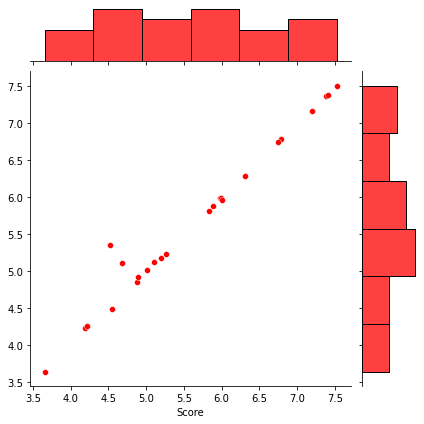

In [61]:
sns.jointplot(x=y_test, y=y_predict,color='red', kind='scatter')

# Saving the model for future prediction

In [62]:
import pickle

In [63]:
Linear_Regression='World_Happiness_model.pickle'
pickle.dump(Linear_reg,open(Linear_Regression,'wb'))
